LINEAR REGRESSION MODEL FOR NON SMOKERS USING ONLY ONE FEATURE

In [1]:
import pandas as pd 
medical_df = pd.read_csv(r'C:\Users\aryag\Downloads\insurance.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [3]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [4]:
smoker_num = {'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_num)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

In [6]:
sex_values={'female':1,'male':0}
sex_num = medical_df.sex.map(sex_values)
medical_df.charges.corr(sex_num)

np.float64(-0.05729206220202533)

In [7]:
corr= medical_df.select_dtypes(include=['number']).corr()

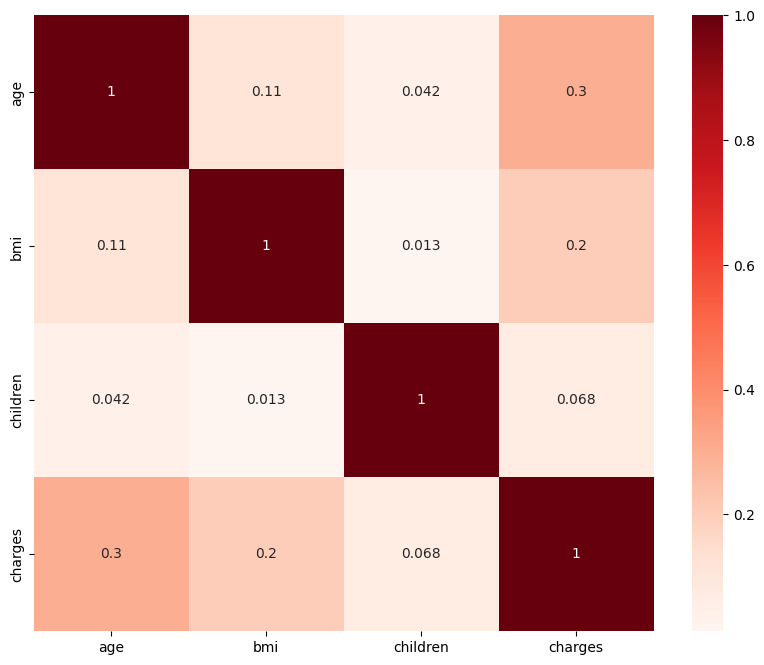

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='Reds')
plt.show()

In [11]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs charges'}, xlabel='age', ylabel='charges'>

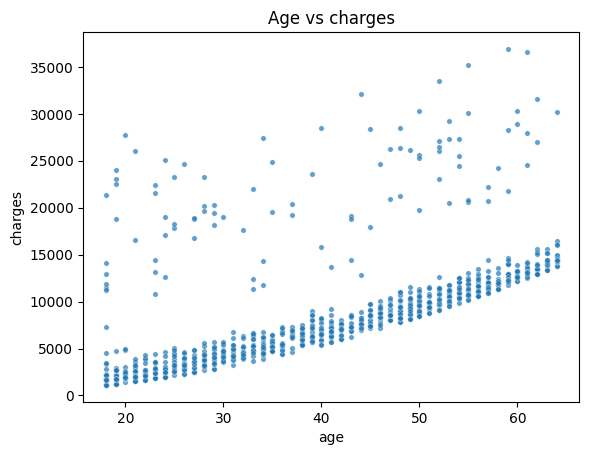

In [12]:
plt.title('Age vs charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15)

USING DEFINITION OF LINEAR REGRESSION

In [29]:
import numpy as np
def try_parameters(x,y):
    ages=non_smoker_df.age
    target=non_smoker_df.charges
    def e_charges(age,x,y):
        return age*x + y
    est_charges = e_charges(ages,x,y)
    predicted = est_charges
    plt.plot(ages,estimated_charges,'r',alpha=0.9)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimated','Actual'])
    loss = rmse(target,predicted)
    print("RMSE loss:" ,loss)

RMSE loss: 4732.85313712509


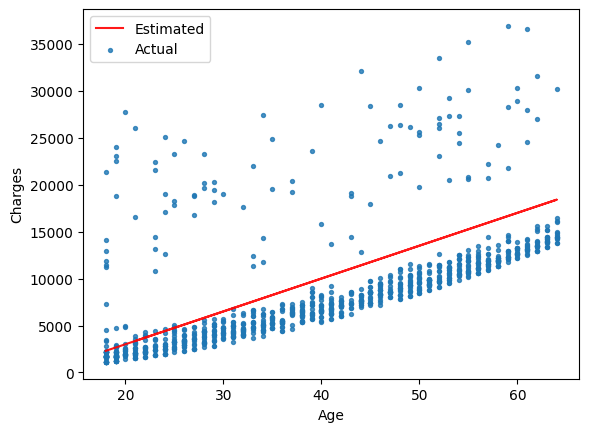

In [30]:
try_parameters(320,-4500)

RMSE loss: 4733.700641699033


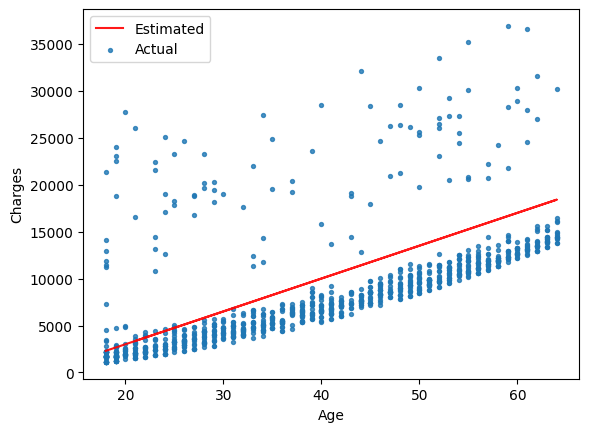

In [31]:
try_parameters(305,-4200)

USING SCIKIT LEARN LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
inputs = non_smoker_df[['age']]
outputs = non_smoker_df.charges
print('input.shape :',inputs.shape)
print('outputs.shape :',outputs.shape)

input.shape : (1064, 1)
outputs.shape : (1064,)


In [35]:
model.fit(inputs,outputs)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
model.predict(np.array([[23],[37],[61]]))

C:\Users\aryag\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [37]:
predicts = model.predict(inputs)
predicts

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [38]:
rmse(outputs,predicts)

np.float64(4662.505766636395)

In [39]:
model.coef_

array([267.24891283])

In [40]:
model.intercept_

np.float64(-2091.4205565650864)

RMSE loss: 4662.505766636395


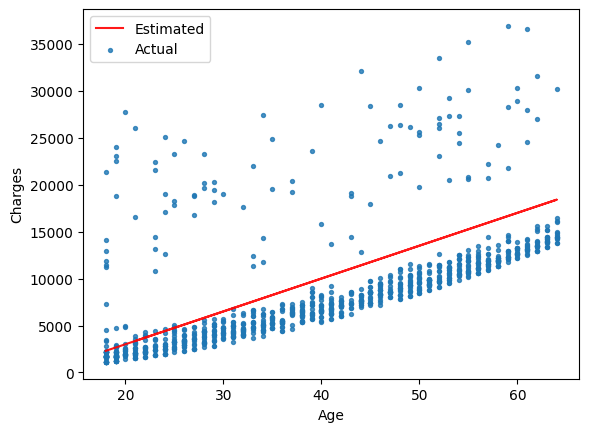

In [41]:
try_parameters(model.coef_,model.intercept_)